# Analyse de données et grands systèmes linéaires

### Importation des bibliothèques système permettant l'éxecution du programme

In [92]:
%matplotlib inline

In [93]:
from matplotlib.pyplot import * 
from numpy import * 
from scipy import * 
from scipy.sparse import * 
from numpy.linalg import *

## I. Introduction au problème :

Initialisation de la matrice K, on fixera la dimension $n = 100 $, puis à l'aide de la formule suivante : $K = (In ⊗ D^t . D) + (D^t . D ⊗ In)$, en explicitant le calcul on trouve que:


$A = D^t . D =  $$\begin{pmatrix}2 & -1 & 0 & ... & 0\\\ -1 & 2 & -1 & ... & ... \\\ 0 & ... & ... & ... & 0 \\\ 0 & ... & -1 & 2 & -1\\\ 0 & ... & 0 & 2 & -1\end{pmatrix}$ 

## II. Résolution du probléme :

### (a) Initialiser la matrice du système $K ∈ ℝ^{n*n} $ et le vecteur $f ∈ ℝ^n $ :
Initialisation de la matrice K, on fixera la dimension $n = 100 $, puis à l'aide de la formule suivante : $K = (In ⊗ D^t . D) + (D^t . D ⊗ In)$, en explicitant le calcul on trouve que:


$A = D^t . D =  $$\begin{pmatrix}2 & -1 & 0 & ... & 0\\\ -1 & 2 & -1 & ... & ... \\\ 0 & ... & ... & ... & 0 \\\ 0 & ... & -1 & 2 & -1\\\ 0 & ... & 0 & 2 & -1\end{pmatrix}$ <br/><br/>
Ou la matrice $In$ est la matrice identité, $⊗$ est le produit de Kronecker.

In [94]:
n = 5
I = eye(n)
A = diags([-1,2,-1], [-1,0,1], shape = (n, n))

In [95]:
print(I)# matrice identité
print(A)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (1, 0)	-1.0
  (2, 1)	-1.0
  (3, 2)	-1.0
  (4, 3)	-1.0
  (0, 0)	2.0
  (1, 1)	2.0
  (2, 2)	2.0
  (3, 3)	2.0
  (4, 4)	2.0
  (0, 1)	-1.0
  (1, 2)	-1.0
  (2, 3)	-1.0
  (3, 4)	-1.0


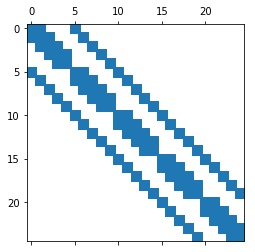

In [96]:
kron(A, I)#le produit de Kronecker
spy(A)
spy(kron(A, I))
K = kron(I, A) + kron(A, I)
spy(K)

In [97]:
print(K)

  (0, 0)	4.0
  (0, 1)	-1.0
  (0, 2)	0.0
  (0, 3)	0.0
  (0, 4)	0.0
  (1, 0)	-1.0
  (1, 1)	4.0
  (1, 2)	-1.0
  (1, 3)	0.0
  (1, 4)	0.0
  (2, 0)	0.0
  (2, 1)	-1.0
  (2, 2)	4.0
  (2, 3)	-1.0
  (2, 4)	0.0
  (3, 0)	0.0
  (3, 1)	0.0
  (3, 2)	-1.0
  (3, 3)	4.0
  (3, 4)	-1.0
  (4, 0)	0.0
  (4, 1)	0.0
  (4, 2)	0.0
  (4, 3)	-1.0
  (4, 4)	4.0
  :	:
  (20, 20)	4.0
  (20, 21)	-1.0
  (20, 22)	0.0
  (20, 23)	0.0
  (20, 24)	0.0
  (21, 20)	-1.0
  (21, 21)	4.0
  (21, 22)	-1.0
  (21, 23)	0.0
  (21, 24)	0.0
  (22, 20)	0.0
  (22, 21)	-1.0
  (22, 22)	4.0
  (22, 23)	-1.0
  (22, 24)	0.0
  (23, 20)	0.0
  (23, 21)	0.0
  (23, 22)	-1.0
  (23, 23)	4.0
  (23, 24)	-1.0
  (24, 20)	0.0
  (24, 21)	0.0
  (24, 22)	0.0
  (24, 23)	-1.0
  (24, 24)	4.0


nous avons fini avec l'initialisation de la matrice du système $K$, alors maintenant, on va initialiser le vecteur $f ∈ ℝ^n$ tel que pour tout n il faut utiliser les vecteurs $e1$ et $en$ de la base canonique de $ℝ^n$ où:
$f = (e1 ⊗ h) + (g ⊗ e1) + (en ⊗ b) + (d ⊗ en)$ <br/>
$e1 = $$\begin{pmatrix}1 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ en = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ h = $$\begin{pmatrix}1 \\\ 1 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ g = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ b = $$\begin{pmatrix}0 \\\ 0 \\\ . \\\ .\\\ .\\\\ 0\end{pmatrix}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; , &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $ d = $$\begin{pmatrix}1 \\\ 1 \\\ . \\\ .\\\ .\\\\ 1\end{pmatrix}$ <br/>

In [98]:
e1 = 0 * ones(n)
e1[0] = 1
en = 0 * ones(n) 
en[n - 1] = 1

In [99]:
print("e1 = ", e1)
print("en = ", en)

e1 =  [ 1.  0.  0.  0.  0.]
en =  [ 0.  0.  0.  0.  1.]


In [100]:
h = 1 * ones(n)
g = 0 * ones(n)
b = 0 * ones(n)
d = 1 * ones(n)

In [101]:
print("h = ", h)
print("g = ", g)
print("b = ", b)
print("d = ", d)

h =  [ 1.  1.  1.  1.  1.]
g =  [ 0.  0.  0.  0.  0.]
b =  [ 0.  0.  0.  0.  0.]
d =  [ 1.  1.  1.  1.  1.]


In [102]:
f = kron(e1, h) + kron(g, e1) + kron(en, b) + kron(d, en)
f = transpose(f)

In [103]:
print(f)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	2.0
  (5, 0)	0.0
  (6, 0)	0.0
  (7, 0)	0.0
  (8, 0)	0.0
  (9, 0)	1.0
  (10, 0)	0.0
  (11, 0)	0.0
  (12, 0)	0.0
  (13, 0)	0.0
  (14, 0)	1.0
  (15, 0)	0.0
  (16, 0)	0.0
  (17, 0)	0.0
  (18, 0)	0.0
  (19, 0)	1.0
  (20, 0)	0.0
  (21, 0)	0.0
  (22, 0)	0.0
  (23, 0)	0.0
  (24, 0)	1.0


### (b) Résolution des problèmes de moindres carrés :

Dans un premier temps, on va utiliser le système linéaire : $K . u = f$ pour chercher une solution approchée du système dans un sous-espace vectoriel $E ∈ ℝ^n$ de dimension $k << n$, on note la matrice $V ∈ ℝ^{n * K}$ ayant pour colonnes les k vectuers d'une base du sous espace E. tout vecteur  $v ∈ E $ s'écrit donc $v = V * α$ avec $α ∈ R^k$.
La solution $v ∈ E$ est donc obtenue en résolvant le problème des moindres carrés.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$min ||K . V . α - f||^2$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$α ∈ R^k$

In [104]:
v0 = lstsq(K.toarray(), f.toarray())[0]

In [105]:
print(v0)#une première aproximation de u

[[ 0.5       ]
 [ 0.7010101 ]
 [ 0.8040404 ]
 [ 0.87474747]
 [ 0.93737374]
 [ 0.2989899 ]
 [ 0.5       ]
 [ 0.64040404]
 [ 0.75757576]
 [ 0.87474747]
 [ 0.1959596 ]
 [ 0.35959596]
 [ 0.5       ]
 [ 0.64040404]
 [ 0.8040404 ]
 [ 0.12525253]
 [ 0.24242424]
 [ 0.35959596]
 [ 0.5       ]
 [ 0.7010101 ]
 [ 0.06262626]
 [ 0.12525253]
 [ 0.1959596 ]
 [ 0.2989899 ]
 [ 0.5       ]]


Là, o, puet chercher une approximation $v$ dans le sous espace affine $v0 + E$, sachant que pour tout vecteur $v ∈ v0 + E$ s'écrit $v = v0 + V * α$, cela conduit à considérer le problème de moindres carrés.<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$min ||K . V . α - r0||^2$&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2)<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$α ∈ R^k$<br />
Avec $ r0 = f - k * v0 $ est le résidu obtenu pour l'approximation $v0$.<br />
Soit $αk$ la solution du problème (2) alors : $ rk = r0 - K * V * αk $ le résidu obtenu à partir de $αk$

In [106]:
r0 = f - K * v0#le résidu obtenu par l'approximation v0

In [107]:
print(r0)

[[  1.22124533e-15]
 [  1.99840144e-15]
 [ -8.88178420e-16]
 [  9.99200722e-16]
 [  2.22044605e-16]
 [  1.77635684e-15]
 [ -3.33066907e-16]
 [  5.55111512e-16]
 [ -6.66133815e-16]
 [  2.77555756e-15]
 [  1.63757896e-15]
 [ -2.16493490e-15]
 [ -5.55111512e-16]
 [ -4.66293670e-15]
 [ -4.44089210e-16]
 [  1.72084569e-15]
 [  4.99600361e-16]
 [  2.33146835e-15]
 [  4.99600361e-16]
 [ -2.22044605e-15]
 [  3.60822483e-16]
 [ -1.49880108e-15]
 [  1.22124533e-15]
 [ -9.99200722e-16]
 [  6.21724894e-15]]


On va implémenter le procédé d'orthonormalisation de Gram-Schmidt en utilisant les bibliothèques systèmes de numpy, où $Q$ est un matrice orthogonale c'est à dire $A^t . A = A . A^t = In$ et $R$ est une matrice triangulaire supérieure.

In [144]:
def gram_schmidt(M):
    Q, R = np.linalg.qr(M)
    return Q, R

In [145]:
def construire_V_nouvelle(Vk, rk):
    return concatenate((Vk, rk), axis = 1)

In [175]:
def calcul_q_nouvelle(K, Q, R):
    a = K * R[:, len(R) - 1]
    b = Q.transpose() * a
    s = norm(a - Q * b)
    res = 1 / s * (a - Q * b)
    return res

In [177]:
def construire_R_nouvelle(K, Q, Rk):
    temp = []
    a = K * R[:, len(R) - 1]
    b = Q.transpose() * a
    s = norm(a - Q * b)
    rk = Q.transpose() * a
    rk.append(s)
    for i in len(Rk):
        temp.append(0)
    Rk.append(temp)
    concatenate((Rk, rk), axis = 1)

In [178]:
def construire_Q_nouvelle(Qk, qk):
    return concatenate((Qk, qk), axis = 1)

In [179]:
def moindres_carrés(K, f, v0, k):
    residus = [r0]
    V = r0
    for i in range(k):
        M = K * V
        Q, R = gram_schmidt(M)
        temp1 = Q
        Q = construire_Q_nouvelle(Q, calcul_q_nouvelle(K, Q, R))
        R = construire_R_nouvelle(K, temp1, R)
        
        
    return residus, v0, r0, Q, R
        
print(moindres_carrés(K, f, v0, 1))

ValueError: dimension mismatch

### (c) Implémentation de la méthode restarting :